Misalignment (Pitch & Yaw)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Now let's add a mesh dataset at a few different times so that we can see how the misalignment affect the surfaces of the stars.

In [3]:
b.add_dataset('mesh', times=[0], dataset='mesh01', columns=['teffs'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

Relevant Parameters
------------------------

The 'pitch' parameter defines the misalignment of a given star in the same direction as the inclination.  We can see how it is defined relative to the inclination by accessing the constraint.

Note that, by default, it is the *inclination* of the *component* that is constrained with the inclination of the orbit and the pitch as free parameters.

In [4]:
print b['pitch@component']

ParameterSet: 2 parameters
         pitch@primary@component: 0.0 deg
       pitch@secondary@component: 0.0 deg


In [5]:
print b['incl@constraint']

ParameterSet: 2 parameters
         incl@primary@constraint: {incl@binary@component} + {pitch@primary@component}
       incl@secondary@constraint: {incl@binary@component} + {pitch@secondary@component}


Similarly, the 'yaw' parameter defines the misalignment in the direction of the lonigtude of the ascending node.

Note that, by default, it is the *long_an* of the *component* that is constrained with the long_an of the orbit and the yaw as free parameters.

In [6]:
print b['yaw@component']

ParameterSet: 2 parameters
           yaw@primary@component: 0.0 deg
         yaw@secondary@component: 0.0 deg


In [7]:
print b['long_an@constraint']

ParameterSet: 2 parameters
      long_an@primary@constraint: {long_an@binary@component} + {yaw@primary@component}
    long_an@secondary@constraint: {long_an@binary@component} + {yaw@secondary@component}


The long_an of a star is a bit of an odd concept, and really is just meant to be analogous to the inclination case.  In reality, it is the angle of the "equator" of the star on the sky.

In [8]:
print b['long_an@primary@component'].description

Longitude of the ascending node (ie. equator) of the star


Note also that the system is aligned by default, with the pitch and yaw both set to zero.

Misaligned Systems
--------------------------------------------

To create a misaligned system, we must set at pitch and/or yaw to be non-zero.

But first let's create an aligned system for comparison.  In order to easily see the spin-axis, we'll plot the effective temperature and spin-up our star to exaggerate the effect.

In [12]:
b['syncpar@secondary'] = 5.0

In [13]:
b['pitch@secondary'] = 0
b['yaw@secondary'] = 0

In [14]:
b.run_compute(irrad_method='none')

Wed, 23 Jan 2019 10:39 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 8 parameters | components: primary, secondary>

We'll plot the mesh as it would be seen on the plane of the sky.

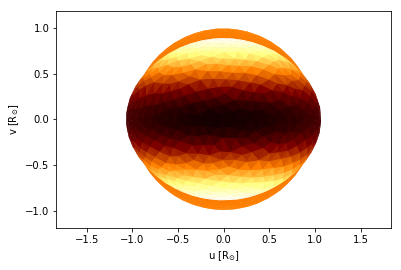

In [15]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='us', y='vs', show=True)

and also with the line-of-sight along the x-axis.

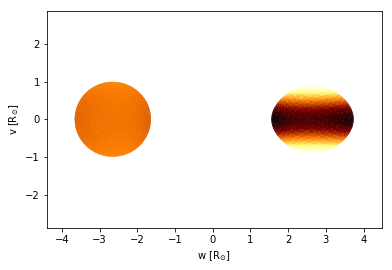

In [16]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='ws', y='vs', show=True)

If we set the pitch to be non-zero, we'd expect to see a change in the spin axis along the line-of-sight.

In [17]:
b['pitch@secondary'] = 30
b['yaw@secondary'] = 0

In [18]:
b.run_compute(irrad_method='none')

Wed, 23 Jan 2019 10:39 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 8 parameters | components: primary, secondary>

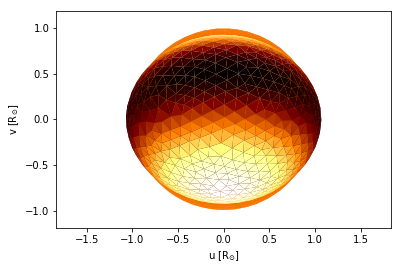

In [19]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='us', y='vs', show=True)

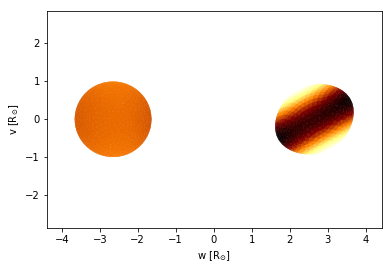

In [20]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='ws', y='vs', show=True)

And if we set the yaw to be non-zero, we'll see the rotation axis rotate on the plane of the sky.

In [22]:
b['pitch@secondary@component'] = 0
b['yaw@secondary@component'] = 30

In [23]:
b.run_compute(irrad_method='none')

Wed, 23 Jan 2019 10:40 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 8 parameters | components: primary, secondary>

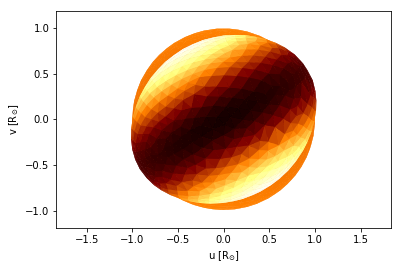

In [24]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='us', y='vs', show=True)

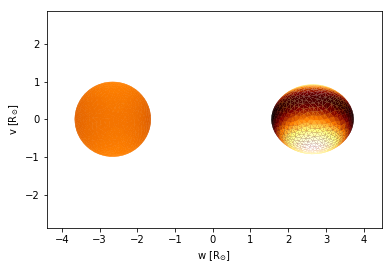

In [25]:
afig, mplfig = b.plot(time=0.0, fc='teffs', ec='none', x='ws', y='vs', show=True)